In [1]:
# Librerias necesarias para el proyecto
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import pycolmap
import open3d as o3d
from pathlib import Path
import shutil
import urllib.request
import zipfile
import enlighten
from pycolmap import logging

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Calibración de la Cámara

In [5]:
def escalar_imagen(ruta_imagen, escala=0.2):
    # Cargar la imagen desde la ruta especificada
    imagen = cv.imread(ruta_imagen)

    # Obtener las dimensiones originales de la imagen
    alto, ancho = imagen.shape[:2]

    # Calcular las nuevas dimensiones
    nuevo_ancho = int(ancho * escala)
    nuevo_alto = int(alto * escala)

    # Redimensionar la imagen
    imagen_escalada = cv.resize(imagen, (nuevo_ancho, nuevo_alto), interpolation=cv.INTER_AREA)

    # Retornar la imagen escalada
    return imagen_escalada

In [6]:
# Calibracion de la camara

"""
La mayoría del código fue sacado de:
https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html
"""
 
# Criterio de terminación
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
print(criteria)
 
# Preparar los puntos del tablero
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
 
# Arreglos que contienen los puntos
objpoints = [] # 3d 
imgpoints = [] # 2d


"""
Es importante asegurar que las imágenes estén en el mismo espacio de trabajo
"""
images = glob.glob('camara/*.jpg')

print(images)

for fname in images:
    #img = cv.imread(fname)
    """
    Se escaló la imagen a una resolución más pequeña porque Python
    tenía problemas para detectar las esquinas con la resolución original
    """
    img = escalar_imagen(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
    # Hallar las coordenadas del tablero
    ret, corners = cv.findChessboardCorners(gray, (7,7), None)
    
    # Verificar si en efecto se retornaron esquinas
    if ret == True:
        objpoints.append(objp)
        
        #Ayuda a mejorar las coordenadas de las esquinas halladas.
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
 
        # Mostrar las esquinas del tablero
        #cv.drawChessboardCorners(img, (7,7), corners2, ret)
        #cv.imshow('img', img)
        #cv.waitKey(450)
 
#cv.destroyAllWindows()

# Hallar la matriz de la cámara
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("La matriz de la camara es: \n",mtx)

(3, 30, 0.001)
['camara\\20250211_103111.jpg', 'camara\\20250211_103113.jpg', 'camara\\20250211_103119.jpg', 'camara\\20250211_103122.jpg', 'camara\\20250211_103126.jpg', 'camara\\20250211_103132.jpg', 'camara\\20250211_103138.jpg', 'camara\\20250211_103142.jpg', 'camara\\20250211_103147.jpg', 'camara\\20250211_103151.jpg']
La matriz de la camara es: 
 [[672.73192451   0.         420.58287132]
 [  0.         674.8497717  260.26338876]
 [  0.           0.           1.        ]]


# Extraer características y matriz fundamental con geometria

repetido


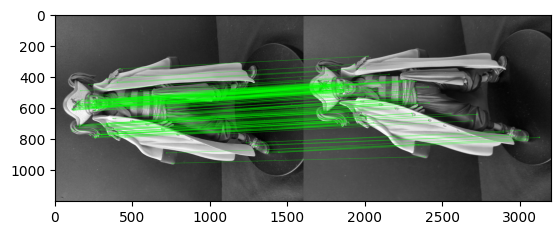

Matriz fundamental
[[ 0.00566385  0.04532948 -0.70359868]
 [-0.00171684 -0.00335188  0.05338101]
 [ 0.70547143 -0.04797069  0.00268622]]
Rotacion y translacion
[[ 0.99993393  0.00768917  0.00854468]
 [-0.00820768  0.99801728  0.06240312]
 [-0.00804791 -0.06246913  0.99801445]] [[-0.07565792]
 [-0.99713217]
 [-0.0018192 ]]
Coordenadas 3D de los puntos triangulados:
[[-9.08018425e-02 -3.35039385e-02 -5.79826087e-02 -3.21844593e-02
  -6.16925173e-02 -6.16925173e-02 -1.21689186e-01 -6.61966428e-02
  -1.12168722e-01 -7.02733770e-02 -7.87761286e-02 -7.95609429e-02
  -1.36553779e-01 -9.57033709e-02 -9.18257609e-02 -5.99102564e-02
  -5.99102564e-02 -8.95927325e-02 -9.45495591e-02 -9.81454253e-02
  -1.05514407e-01 -1.05514407e-01 -1.62598610e-01 -1.11755423e-01
  -1.04885884e-01 -1.06904656e-01 -1.06904656e-01 -1.11978643e-01
  -1.14323907e-01 -7.28527158e-02 -1.19367428e-01 -7.56370649e-02
  -7.96618834e-02 -1.17745191e-01 -1.51393235e-01 -1.04847416e-01
  -1.27373755e-01 -1.42295614e-01 -1.37

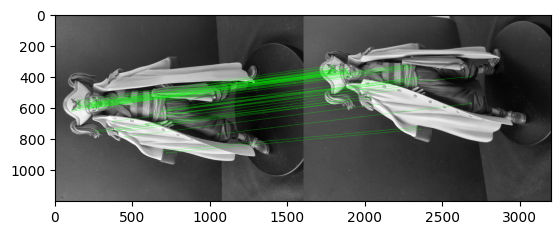

Matriz fundamental
[[ 0.00588909 -0.10539666 -0.69756535]
 [ 0.19696916  0.00753535 -0.04564478]
 [ 0.67716182  0.05143429  0.01134678]]
Rotacion y translacion
[[ 0.99995172  0.00637393  0.0074789 ]
 [-0.00730626  0.99120854  0.13210693]
 [-0.0065711  -0.13215519  0.99120726]] [[ 0.06722263]
 [-0.95818883]
 [ 0.27812816]]
Coordenadas 3D de los puntos triangulados:
[[3.5736033e-01 3.8902342e-01 4.4435689e-01 3.5174754e-01 3.5174754e-01
  3.6748019e-01 5.0039858e-01 5.3506917e-01 5.5149621e-01 7.2736686e-01
  5.0620800e-01 5.2679354e-01 5.5116749e-01 3.9171189e-01 5.6659615e-01
  6.5732497e-01 7.3428482e-01 6.6355819e-01 7.3491168e-01 7.0308352e-01
  7.2599483e-01 5.9945798e-01 5.0693589e-01 7.5503290e-01 8.1122464e-01
  8.3277804e-01 8.0140656e-01 5.3943390e-01 8.0261570e-01 8.1674892e-01
  8.6736667e-01 5.6848085e-01 8.5602736e-01 5.9309679e-01 6.2312514e-01
  1.1493771e+00 8.2060277e-01 8.5389107e-01 6.4120662e-01 6.0820729e-01
  6.5848988e-01 6.4657730e-01 9.9084038e-01 7.2844779e-01

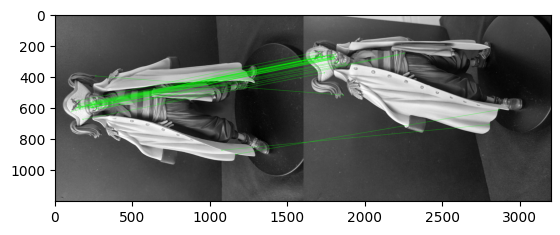

Matriz fundamental
[[ 0.01162947  0.014373   -0.69752285]
 [ 0.21126007 -0.01943152  0.11234189]
 [ 0.67233275 -0.05345632 -0.02453645]]
Rotacion y translacion
[[ 0.99645417  0.08212178  0.01830559]
 [-0.08364932  0.94354569  0.32050634]
 [ 0.00904839 -0.32090113  0.94706948]] [[-0.1619879 ]
 [-0.94060714]
 [ 0.29835906]]
Coordenadas 3D de los puntos triangulados:
[[1.16346255e-01 1.34525135e-01 1.41620442e-01 1.51123807e-01
  1.48584470e-01 1.52600691e-01 1.53014094e-01 1.51560456e-01
  1.59717739e-01 1.55395150e-01 1.61718220e-01 1.70342356e-01
  1.70342356e-01 2.16346234e-01 1.57971993e-01 2.72215545e-01
  1.97899252e-01 1.93807200e-01 2.09549591e-01 2.02215597e-01
  1.82117939e-01 2.17815727e-01 2.31849343e-01 2.23290771e-01
  2.22915486e-01 2.33504117e-01 2.31330425e-01 2.32434139e-01
  2.50527114e-01 2.56431967e-01 2.48504966e-01 2.40814537e-01
  3.26149315e-01 2.49301910e-01 2.94682801e-01 2.47815207e-01
  7.02466249e-01 4.39902663e-01 4.63167489e-01 6.49902523e-01
  8.87117803e

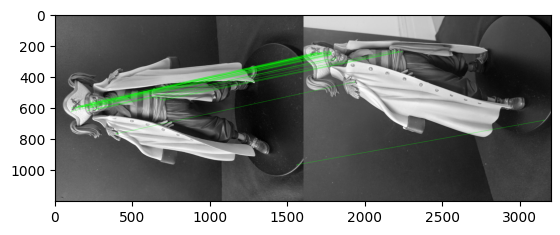

Matriz fundamental
[[-0.01777975 -0.00331776 -0.70280327]
 [ 0.12300738 -0.01267559  0.07160487]
 [ 0.69199292 -0.07452865 -0.03021545]]
Rotacion y translacion
[[ 9.99680094e-01  2.37303899e-04 -2.52913656e-02]
 [ 4.00696877e-03  9.85841572e-01  1.67631556e-01]
 [ 2.49730592e-02 -1.67679271e-01  9.85525245e-01]] [[-0.1071489 ]
 [-0.97936843]
 [ 0.17133768]]
Coordenadas 3D de los puntos triangulados:
[[1.4871931e-01 1.5479164e-01 1.7666110e-01 1.8773732e-01 2.4070024e-01
  2.0559140e-01 2.0559140e-01 2.3571850e-01 2.2507222e-01 2.2509743e-01
  2.3235382e-01 2.3235382e-01 2.3795278e-01 2.5992236e-01 2.7576068e-01
  2.6602796e-01 2.8082198e-01 3.2616991e-01 3.0475184e-01 3.2806659e-01
  3.1362072e-01 3.3001265e-01 3.3001265e-01 3.3996433e-01 3.2658353e-01
  3.5662431e-01 4.8993370e-01 3.3842090e-01 3.6360273e-01 2.0212437e-01
  4.2190573e-01 5.1154858e-01 4.4399348e-01 6.0332543e-01 1.2129431e+00
  4.0385538e-01 4.5660391e-01 5.6335914e-01 1.1930747e+00 8.1520671e-01
  8.2081252e-01 8.261

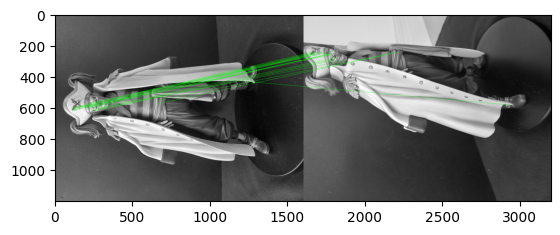

Matriz fundamental
[[-0.01405494  0.11883627 -0.69163804]
 [ 0.31726905 -0.02062668  0.06767395]
 [ 0.63146568 -0.0088883  -0.05314546]]
Rotacion y translacion
[[ 0.99546106  0.09509013 -0.00389075]
 [-0.07429056  0.80197078  0.59272572]
 [ 0.05948264 -0.58974633  0.80539499]] [[-0.12097292]
 [-0.88807109]
 [ 0.44350343]]
Coordenadas 3D de los puntos triangulados:
[[6.68395460e-02 6.62232041e-02 6.90750629e-02 1.23565830e-01
  6.89275935e-02 7.04403669e-02 9.10494179e-02 7.01527894e-02
  7.38637820e-02 7.90088400e-02 8.75800624e-02 2.83456087e-01
  9.51869860e-02 1.04008861e-01 1.11177526e-01 1.06794722e-01
  1.17906265e-01 1.11578271e-01 1.51173905e-01 1.22996800e-01
  1.39094830e-01 1.15628861e-01 1.19211920e-01 1.63731515e-01
  1.28390774e-01 1.78637519e-01 1.54699907e-01 7.81165779e-01
  7.13640332e-01 2.92220950e-01 9.43348169e-01 8.12732279e-01
  5.09066641e-01 2.66661048e-01 3.76610965e-01 2.82722831e-01
  3.13963056e-01 3.27681279e+00 1.06183445e+00 8.80114913e-01]
 [7.62176394

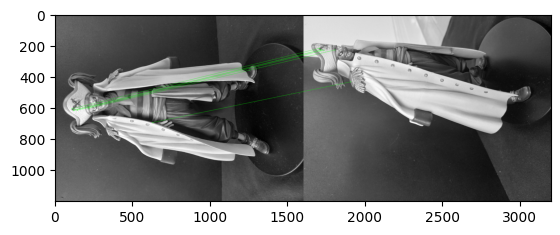

Matriz fundamental
[[-0.05709384 -0.35505161  0.18125159]
 [ 0.52023722 -0.28216879 -0.38695433]
 [ 0.08317284  0.51202975 -0.26217299]]
Rotacion y translacion
[[ 0.96332398 -0.018237    0.26772061]
 [ 0.14211157  0.88096274 -0.45134128]
 [-0.22762077  0.47283407  0.85124422]] [[-0.82198116]
 [ 0.000842  ]
 [-0.56951406]]
Coordenadas 3D de los puntos triangulados:
[[ 1.0650848e+00  1.0938665e+00  1.1232533e+00  1.2356470e+00
   1.1689063e+00  1.7454375e+00  1.8507513e+00  1.8875816e+00
   1.6669266e+01  6.0314336e+00  5.7632909e+00  4.5343986e+00
   2.5028825e+00  2.0235767e+01  1.0356268e+01  1.5637465e+01
   3.4961965e+00  6.5776496e+00  2.7055511e+00  1.2093518e+01
   1.7751274e+00 -8.2577982e+00 -1.3801471e+01  4.7197032e+00
   3.3073442e+00 -3.1370888e+01]
 [ 1.7258197e+00  1.7391340e+00  1.7532907e+00  1.8071800e+00
   1.7699155e+00  2.0521877e+00  2.1025739e+00  2.1191258e+00
   9.2334013e+00  4.1039567e+00  3.9843075e+00  3.3955379e+00
   2.4143987e+00  1.0967414e+01  6.1845660

In [7]:
# Características de la imagen
"""
La mayoría del código fue sacado de:
https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html
"""

images = glob.glob('imagenes/*.jpg')

# SIFT
sift = cv.SIFT_create()

# FLANN parametros
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # Cuantos checks queremos o vacio
flann = cv.FlannBasedMatcher(index_params,search_params)


# Matches minimos
MIN_MATCH_COUNT = 20

# Maximo de imagenes a mostrar(opcional)
MAX = 5

for image in images:
    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    keypoints, des = sift.detectAndCompute(gray,None)

    for image2 in images:
        if image2 == image:
            print('repetido')
            continue
        if MAX < 0:
            continue
        else:
            MAX = MAX - 1

        img2 = cv.imread(image2)
        gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

        keypoints2, des2 = sift.detectAndCompute(gray2,None)
        
        # Hallar los matches
        matches = flann.knnMatch(des,des2,k=2)


        # Arreglo para guardar buenos matches
        good = []
        # Prueba de Lowe's paper
        for i,(m,n) in enumerate(matches):
            if m.distance < 0.7*n.distance:
                good.append(m)

    
        
        # Puntos de inicio y llegada de los matches
        if len(good)>MIN_MATCH_COUNT:
            # Coordenas de inicio y llegada de los matches
            src_pts = np.float32([ keypoints[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
            dst_pts = np.float32([ keypoints2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
            
            # Correr el algoritmo de RANSAC
            E, mask = cv.findEssentialMat(src_pts, dst_pts, mtx, method=cv.RANSAC, prob=0.999, threshold=1.0)

            # Rotacion y translacion
            _, R, t, _ = cv.recoverPose(E, src_pts, dst_pts, mtx, mask=mask)

            #Dibujar los matches
            matchesMask = mask.ravel().tolist()
 
            h,w = gray.shape
            pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
            dst = cv.perspectiveTransform(pts,E)
 
            img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)


            draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
 
            img3 = cv.drawMatches(gray,keypoints,gray2,keypoints2,good,None,**draw_params)
            
            plt.imshow(img3, 'gray'),plt.show()

            # Matrices de proyección
            P1 = np.hstack((np.eye(3, 3), np.zeros((3, 1))))  # Primera cámara (origen)
            P2 = np.hstack((R, t))  # Segunda cámara

            # Triangulación
            points_4d_hom = cv.triangulatePoints(P1, P2, src_pts, dst_pts)
            points_3d = points_4d_hom[:3] / points_4d_hom[3]  # Convertir a coordenadas 3D

            print('Matriz fundamental')
            print(E)

            print('Rotacion y translacion')
            print(R,t)

            print("Coordenadas 3D de los puntos triangulados:")
            print(points_3d)


        else:
            matchesMask = None

        



# Reconstrucción

In [ ]:

def incremental_mapping_with_pbar(database_path, image_path, sfm_path):
    num_images = pycolmap.Database(database_path).num_images
    with enlighten.Manager() as manager:
        with manager.counter(
            total=num_images, desc="Images registered:"
        ) as pbar:
            pbar.update(0, force=True)
            reconstructions = pycolmap.incremental_mapping(
                database_path,
                image_path,
                sfm_path,
                initial_image_pair_callback=lambda: pbar.update(2),
                next_image_callback=lambda: pbar.update(1),
            )
    return reconstructions


def run():
    output_path = Path("output/")
    image_path = Path("imagenes/")
    database_path = output_path / "database.db"
    sfm_path = output_path / "sfm"

    output_path.mkdir(exist_ok=True)
    # The log filename is postfixed with the execution timestamp.
    logging.set_log_destination(logging.INFO, output_path / "INFO.log.")

    data_url = "https://cvg-data.inf.ethz.ch/local-feature-evaluation-schoenberger2017/Strecha-Fountain.zip"
    if not image_path.exists():
        logging.info("Downloading the data.")
        zip_path = output_path / "data.zip"
        urllib.request.urlretrieve(data_url, zip_path)
        with zipfile.ZipFile(zip_path, "r") as fid:
            fid.extractall(output_path)
        logging.info(f"Data extracted to {output_path}.")

    if database_path.exists():
        database_path.unlink()
    pycolmap.set_random_seed(0)
    pycolmap.extract_features(database_path, image_path)
    pycolmap.match_exhaustive(database_path)

    if sfm_path.exists():
        shutil.rmtree(sfm_path)
    sfm_path.mkdir(exist_ok=True)

    recs = incremental_mapping_with_pbar(database_path, image_path, sfm_path)
    # alternatively, use:
    # import custom_incremental_pipeline
    # recs = custom_incremental_pipeline.main(
    #     database_path, image_path, sfm_path
    # )

    # Exportar la nube de puntos en formato .ply
    for idx, rec in recs.items():
        logging.info(f"#{idx} {rec.summary()}")
        ply_path = sfm_path / f"reconstruction_{idx}.ply"
        rec.export_PLY(ply_path)
        logging.info(f"Nube de puntos guardada en: {ply_path}")


if __name__ == "__main__":
    run()

# Visualizar Reconstrucción

In [2]:
# Ruta al archivo .ply
ruta_ply = "output/sfm/reconstruction_0.ply"

# Cargar la nube de puntos
nube_puntos = o3d.io.read_point_cloud(ruta_ply)

# Verificar si la nube de puntos se cargó correctamente
if not nube_puntos:
    print(f"Error: No se pudo cargar la nube de puntos desde {ruta_ply}.")
else:
    # Visualizar la nube de puntos
    print("Visualizando la nube de puntos...")
    o3d.visualization.draw_geometries([nube_puntos])

Visualizando la nube de puntos...


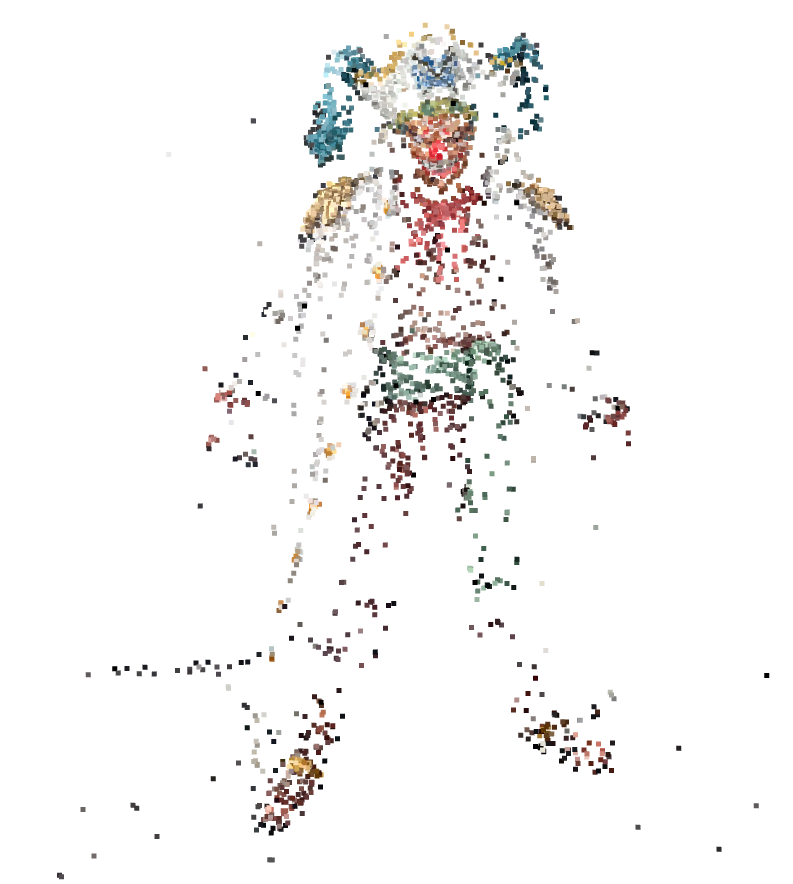